In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import seaborn as sns


from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split , GridSearchCV
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score , confusion_matrix
from sklearn.svm import SVC
import xgboost as xgb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

np.random.seed(42)

In [22]:
!pip install xgboost


In [23]:
def create_train_df():
    path =r'C:\Users\julia\train'
    filenames = glob.glob(path + "/*.csv")

    dfs = []
    for filename in filenames:
        dfs.append(pd.read_csv(filename))

    # Concatenate all data into one DataFrame
    big_frame = pd.concat(dfs, ignore_index=False,axis = 1 )
    return big_frame

In [24]:
def create_test_df():
    path =r'C:\Users\julia\test'
    filenames = glob.glob(path + "/*.csv")

    dfs = []
    for filename in filenames:
        dfs.append(pd.read_csv(filename))

    # Concatenate all data into one DataFrame
    big_frame = pd.concat(dfs, ignore_index=False,axis = 1 )
    return big_frame

In [25]:
test_df = create_test_df()

In [26]:
Ids_test = test_df['ID'].sample(n=1,axis=1)
test_df = test_df.drop('ID',axis=1)


In [47]:
test_df.head()

,radius_mean,radius_std,radius_max,texture_mean,texture_std,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max,conc_points_mean,conc_points_std,...,compactness_std,compactness_max,concavity_mean,concavity_std,concavity_max,texture_max,p_mean,p_std,p_max,area_mean
0,14.960,19.10,97.03,687.3,0.08992,0.14890,0.2962,0.08472,26.19,109.10,...,0.01536,0.011870,0.01522,0.002815,16.25,0.09823,0.05940,0.04819,0.1879,0.05852
1,17.850,13.23,114.60,992.1,0.07838,0.08341,0.1783,0.05871,18.42,127.10,...,0.01153,0.007437,0.01302,0.001309,19.82,0.06217,0.04445,0.04178,0.1220,0.05243
2,9.731,15.34,63.78,300.2,0.10720,0.15710,0.3108,0.12590,19.49,71.04,...,0.39600,0.052790,0.03546,0.029840,11.02,0.15990,0.41080,0.07857,0.2548,0.09296
3,11.080,14.71,70.21,372.7,0.10060,0.04306,0.1902,0.07313,16.82,72.01,...,0.01453,0.015830,0.03082,0.004785,11.35,0.05743,0.02363,0.02583,0.1566,0.06669
4,27.220,21.87,182.10,2250.0,0.10940,0.26880,0.2856,0.08082,32.85,220.80,...,0.03109,0.012410,0.01575,0.002747,33.12,0.19140,0.28710,0.18780,0.1800,0.05770


In [28]:
train_df = create_train_df()

In [29]:
train_df.head(5)

,ID,Category,radius_mean,radius_std,radius_max,texture_mean,texture_std,IT,Category,area_std,...,texture_max,perimeter_mean,perimeter_std,perimeter_max,area_mean,ID,Category,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max
0,857810,0,13.05,19.31,82.61,527.2,0.08060,857810,0,0.4040,...,0.03789,0.000692,0.004167,0.1819,0.05501,857810,0,0.01111,0.2439,0.06289
1,84300903,1,19.69,21.25,130.00,1203.0,0.10960,84300903,1,0.7456,...,0.15990,0.197400,0.127900,0.2069,0.05999,84300903,1,0.24300,0.3613,0.08758
2,89122,1,19.40,18.18,127.20,1145.0,0.10370,89122,1,0.4709,...,0.14420,0.162600,0.094640,0.1893,0.05892,89122,1,0.22520,0.3590,0.07787
3,8810703,1,28.11,18.47,188.50,2499.0,0.11420,8810703,1,2.8730,...,0.15160,0.320100,0.159500,0.1648,0.05525,8810703,1,0.15950,0.1648,0.05525
4,904969,0,12.34,14.95,78.29,469.1,0.08682,904969,0,0.3833,...,0.04571,0.021090,0.020540,0.1571,0.05708,904969,0,0.04793,0.2298,0.05974


In [48]:
train_df.describe()

,ID,Category,radius_mean,radius_std,radius_max,texture_mean,texture_std,IT,Category,area_std,...,texture_max,perimeter_mean,perimeter_std,perimeter_max,area_mean,ID,Category,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max
count,2.840000e+02,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,2.840000e+02,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,2.840000e+02,284.000000,284.000000,284.000000,284.000000
mean,2.800030e+07,0.373239,14.148996,19.495528,92.026021,658.107394,0.096198,2.800030e+07,0.373239,0.419343,...,0.103987,0.087984,0.049109,0.180905,0.062776,2.800030e+07,0.373239,0.114157,0.289535,0.083963
std,1.200205e+08,0.484519,3.571511,4.234565,24.513772,357.663036,0.014897,1.200205e+08,0.484519,0.309239,...,0.050364,0.076533,0.038963,0.027561,0.007116,1.200205e+08,0.484519,0.066556,0.062742,0.018969
min,8.670000e+03,0.000000,6.981000,10.720000,43.790000,143.500000,0.062510,8.670000e+03,0.000000,0.114400,...,0.019380,0.000000,0.000000,0.106000,0.050250,8.670000e+03,0.000000,0.000000,0.156500,0.055040
25%,8.735340e+05,0.000000,11.667500,16.947500,74.967500,416.950000,0.085140,8.735340e+05,0.000000,0.238025,...,0.066757,0.029555,0.020850,0.160575,0.057495,8.735340e+05,0.000000,0.065430,0.251075,0.071843
50%,9.086925e+05,0.000000,13.505000,19.075000,87.265000,559.200000,0.095410,9.086925e+05,0.000000,0.331250,...,0.095160,0.065830,0.035125,0.178250,0.061735,9.086925e+05,0.000000,0.096315,0.279650,0.079505
75%,8.810963e+06,1.000000,16.085000,21.592500,105.925000,799.100000,0.105400,8.810963e+06,1.000000,0.508425,...,0.130000,0.122225,0.070445,0.196400,0.066455,8.810963e+06,1.000000,0.161600,0.314800,0.091895
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,9.113205e+08,1.000000,2.873000,...,0.283200,0.426400,0.182300,0.304000,0.095750,9.113205e+08,1.000000,0.291000,0.555800,0.207500


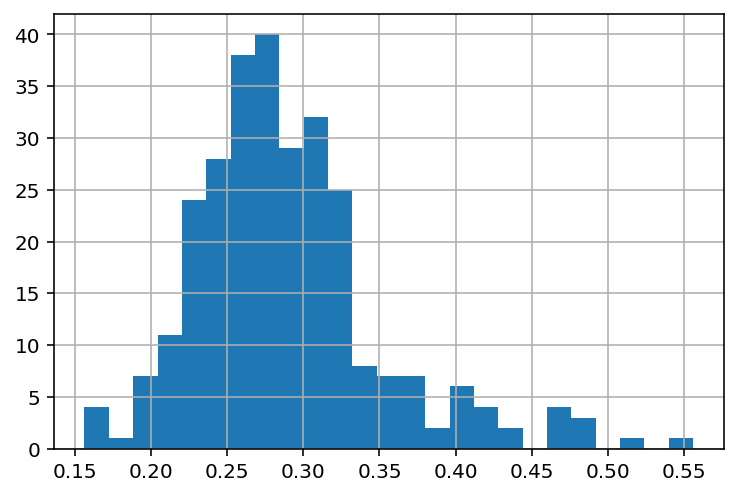

In [30]:
train_df.fractal_dimension_std.hist(bins=25)

In [31]:
X = train_df.drop(['ID','1D','IT','Category'],axis=1)
y = train_df['Category'].sample(n=1,axis=1)

In [32]:
scaler = StandardScaler()
X = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)

In [33]:
def estimate_accuracy(clf, X, y, cv=5):
    return cross_val_score(clf, X, y, cv=5, scoring='f1').mean()


In [34]:
pca = PCA(n_components=17)
pca.fit(X)
X_pca = pd.DataFrame(pca.transform(X))

In [35]:
features = X_pca.columns
features1 = X.columns

In [36]:
from sklearn.metrics import accuracy_score

In [37]:
model1 = xgb.XGBClassifier()
model2 = xgb.XGBClassifier(n_estimators=100, max_depth=8, learning_rate=0.1, subsample=0.5)
model3 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)

In [38]:
abc = AdaBoostClassifier(algorithm='SAMME')
abc.fit(X, y)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [39]:
abc.feature_importances_

array([0.        , 0.03717629, 0.        , 0.01406792, 0.03332092,
       0.01568312, 0.        , 0.        , 0.07581653, 0.        ,
       0.09750086, 0.01387951, 0.07825097, 0.        , 0.        ,
       0.02495626, 0.13797623, 0.0662255 , 0.07846973, 0.01698575,
       0.        , 0.09843824, 0.0159821 , 0.        , 0.04292479,
       0.0221217 , 0.        , 0.05229549, 0.07792808, 0.        ])

In [40]:
importance_feature = ['concavity_max', 'symmetry_std','smoothness_max','fractal_dimention_std','compactness_std']

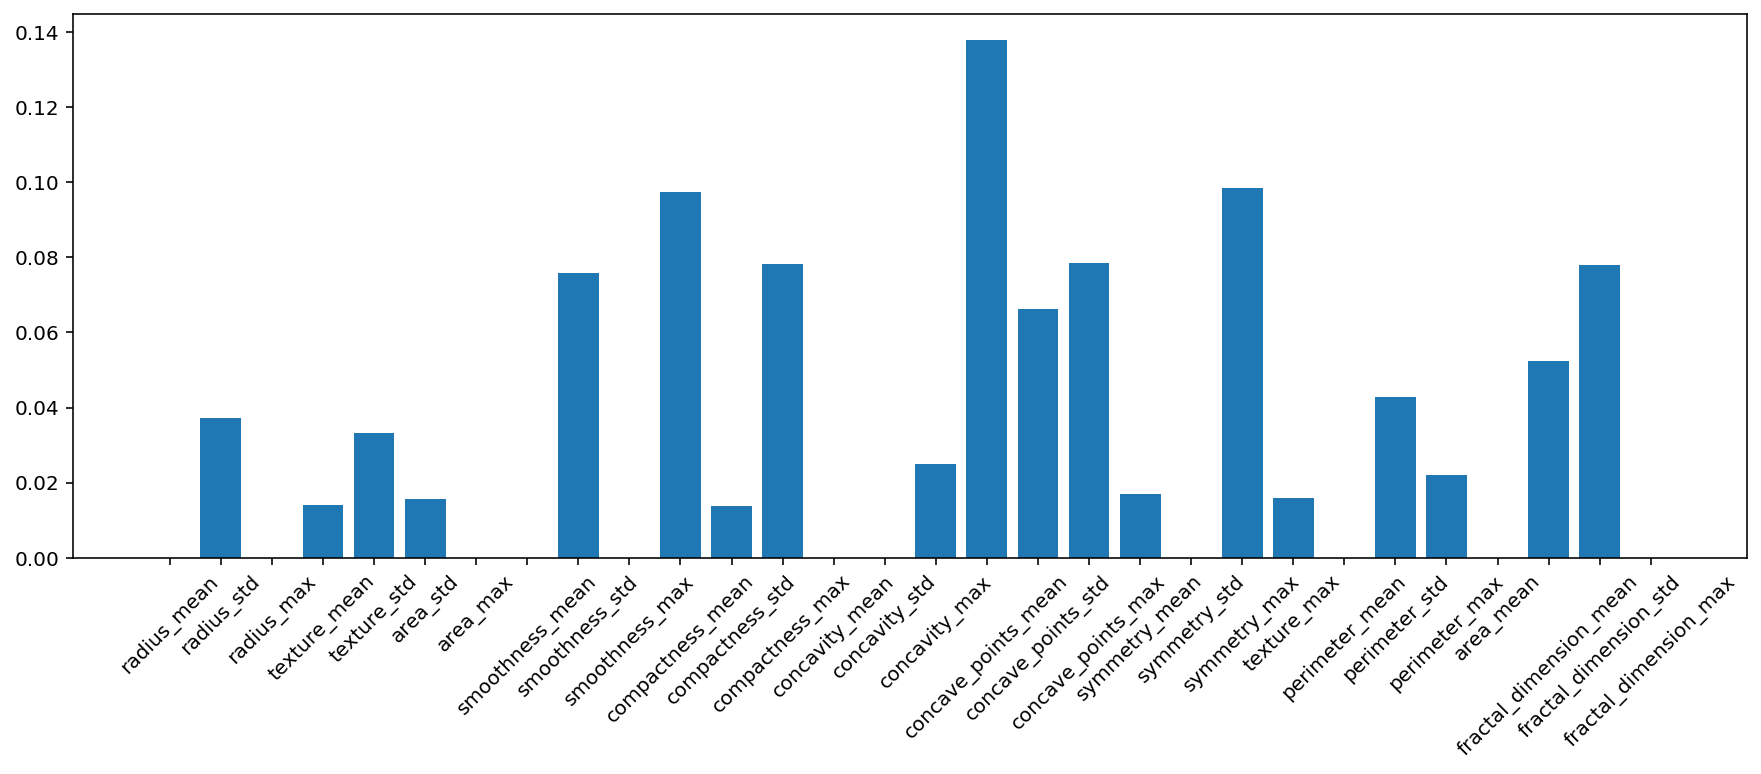

In [41]:
plt.figure(figsize=(15, 5))
plt.xticks(rotation=45)
plt.bar(X.columns, abc.feature_importances_);

In [42]:
def all_models_result(X_pca,y,features):
    values ={}
    
    values['XGB_1'] = estimate_accuracy(model1,X_pca,y)
    values['XGB_2'] = estimate_accuracy(model2,X_pca,y)
    values['XGB_3'] = estimate_accuracy(model3,X_pca,y)
    
    lr = LogisticRegression(solver='liblinear',class_weight=None)
    lr.fit(X_pca, y)
    values['LR'] = estimate_accuracy(lr, X_pca, y)
    bagging_trees = BaggingClassifier(lr)
    values['LR_Begg'] = estimate_accuracy(bagging_trees, X_pca, y)
    
    tree = DecisionTreeClassifier(max_depth=50)
    values['DES_Tree'] = estimate_accuracy(tree, X_pca, y)
    bagging_trees = BaggingClassifier(tree)
    values['DES_Tree_Begg']  = estimate_accuracy(bagging_trees, X_pca, y)
    
    random_tree = DecisionTreeClassifier(max_features=int(np.sqrt(len(features))), max_depth=50)
    values['RDES_Tree'] = estimate_accuracy(random_tree, X_pca, y)
    bagging_random_trees = BaggingClassifier(random_tree)
    values['RDES_Tree_Begg']=estimate_accuracy(bagging_random_trees, X_pca, y)
    
    random_forest = RandomForestClassifier(
        n_estimators=100,
        n_jobs=-1,
        max_features=int(np.sqrt(len(features))),
        max_depth=30)
    values['Rand_Forest'] = estimate_accuracy(random_forest, X_pca, y)
    
    svc = SVC(kernel='linear')
    values['SVC'] = estimate_accuracy(svc,X_pca,y)
    bagging_random_trees = BaggingClassifier(svc)
    values['SVC_Begg']=estimate_accuracy(bagging_random_trees, X_pca, y)
    
    abc = AdaBoostClassifier(algorithm='SAMME')
    values['ABC'] = estimate_accuracy(abc, X_pca, y)
    bagging_random_trees = BaggingClassifier(abc)
    values['ABC_Begg']=estimate_accuracy(bagging_random_trees, X_pca, y)
    
    gb = GradientBoostingClassifier(n_estimators=1000, 
                                subsample=0.9, learning_rate=0.01)
    values['GB'] = estimate_accuracy(gb, X_pca, y)
    #bagging_random_trees = BaggingClassifier(gb)
    #values['GB_Begg']=estimate_accuracy(bagging_random_trees, X_pca, y)
    return values


In [43]:
result = all_models_result(X,y,features1)
result_pca = all_models_result(X_pca,y,features)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shap

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:645: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, 

In [44]:
print(result)
print(result_pca)

{'XGB_1': 0.9270999582525988, 'XGB_2': 0.9413376992957254, 'XGB_3': 0.9420898720615114, 'LR': 0.966745732996442, 'LR_Begg': 0.961640798226164, 'DES_Tree': 0.9073376286535675, 'DES_Tree_Begg': 0.9198778998778998, 'RDES_Tree': 0.8404282664425363, 'RDES_Tree_Begg': 0.9164402264402265, 'Rand_Forest': 0.9316945796140947, 'SVC': 0.9470051049347703, 'SVC_Begg': 0.9513953488372093, 'ABC': 0.940909497007058, 'ABC_Begg': 0.9446176262965826, 'GB': 0.932166491100127}
{'XGB_1': 0.9088224437061646, 'XGB_2': 0.9147139165743816, 'XGB_3': 0.9290880607386562, 'LR': 0.966745732996442, 'LR_Begg': 0.9611529933481153, 'DES_Tree': 0.8538645047658834, 'DES_Tree_Begg': 0.8849554624681015, 'RDES_Tree': 0.8407286407286406, 'RDES_Tree_Begg': 0.8913390636589729, 'Rand_Forest': 0.9048885728359946, 'SVC': 0.9385955904560556, 'SVC_Begg': 0.9611684628474192, 'ABC': 0.9242254814574723, 'ABC_Begg': 0.9200627537836841, 'GB': 0.8885237613751265}


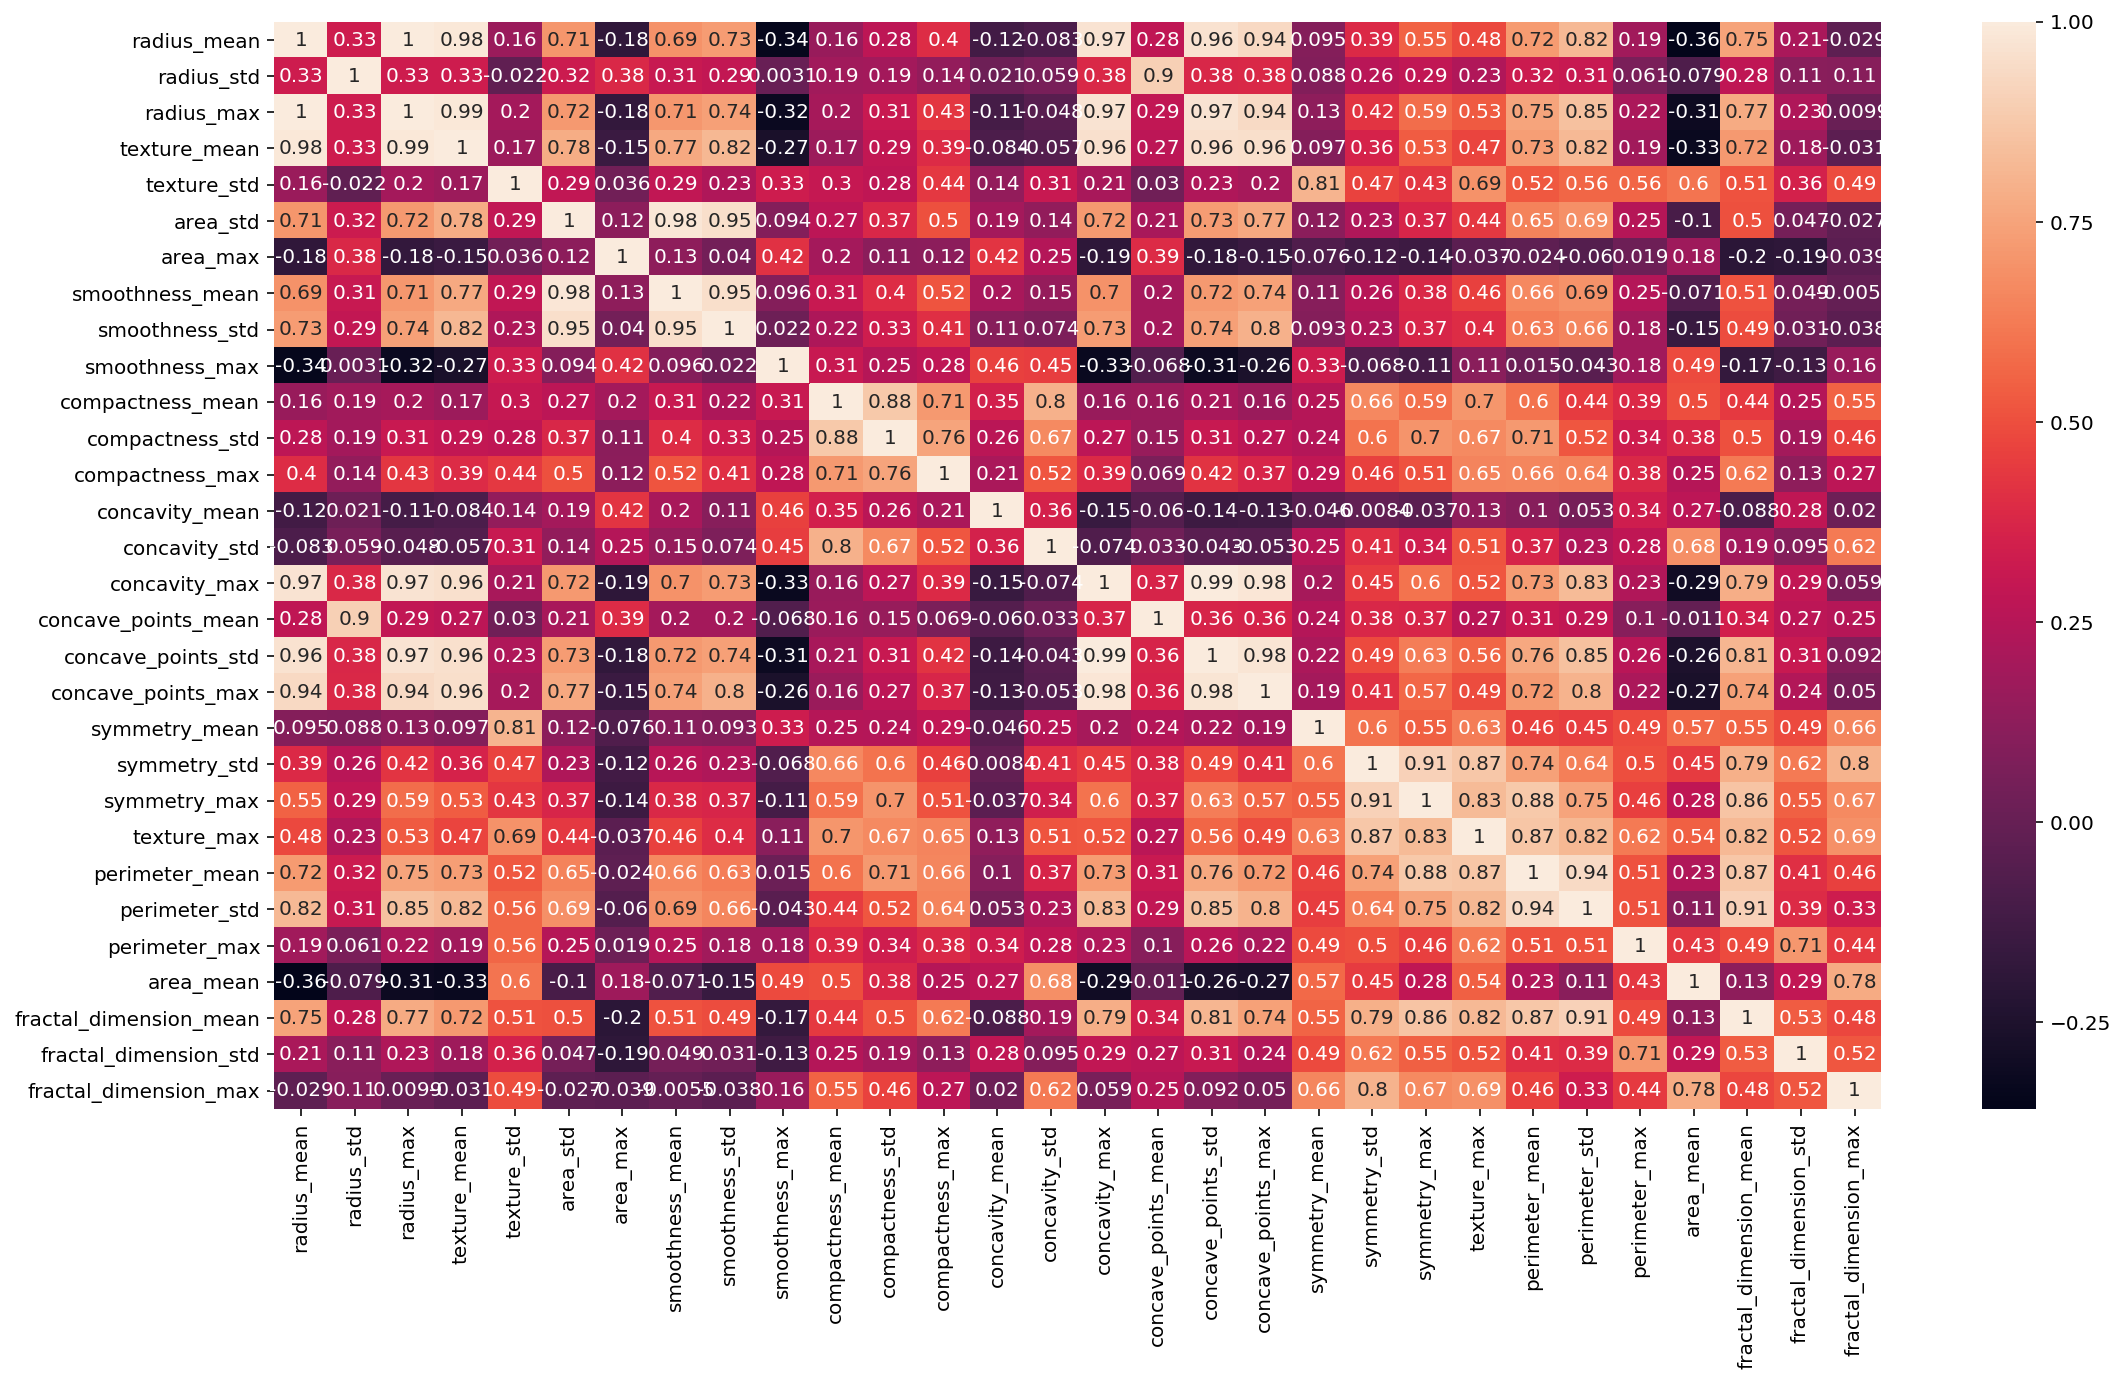

In [45]:
C = X.corr(method='pearson')
plt.figure(figsize=(18,10)) # размер графика
sns.heatmap(data=C, annot=True)

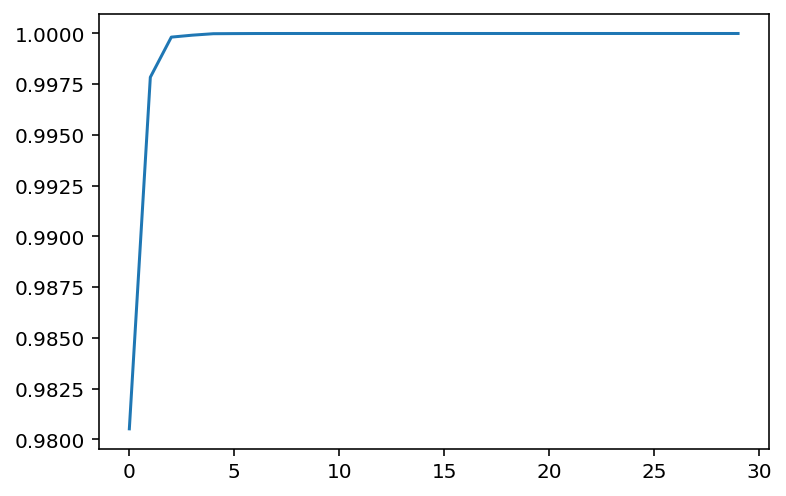

In [86]:
pca = PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [133]:
scaler = StandardScaler()
test_df_STDSc = pd.DataFrame(data = scaler.fit_transform(test_df), columns=test_df.columns)

In [134]:
pca = PCA(n_components=17)
pca.fit(test_df_STDSc)
test_pca = pd.DataFrame(pca.transform(test_df_STDSc))

In [135]:
test_pca.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.478385,-0.859709,-0.902288,0.179414,0.271829,-0.347963,0.148652,-0.042617,-0.149938,0.298477,-0.466964,0.309460,-0.746567,0.137101,0.142514,-0.075963,-0.136425
1,-1.676174,-4.487223,1.387318,-1.665601,1.535851,0.064346,-0.271797,-0.263931,-0.398368,-0.779862,0.610729,0.101825,0.103861,0.010919,-0.059149,0.132012,-0.102541
2,7.168318,12.330887,6.468647,0.149052,6.202788,-0.103890,1.793385,-3.029087,3.523549,2.328366,2.343424,-1.613734,-0.320344,-0.011489,0.500862,-0.390720,-0.529837
3,-3.332625,1.806528,2.667727,-1.127379,-0.518567,1.803123,0.697573,0.492730,-1.203774,-0.602361,0.306094,-0.007977,-0.364876,0.576633,-0.796740,-0.104540,0.477793
4,9.639000,-6.390419,-0.275766,-0.640442,-0.380231,0.560671,0.299181,-0.916367,-1.147513,0.287877,1.487808,-0.262391,0.323267,0.568576,0.090057,0.149900,0.184636


svc = SVC(kernel='linear')
bagging_trees = BaggingClassifier(svc)
bagging_trees.fit(X_pca,y)
pred = bagging_trees.predict(test_pca)

In [136]:
lr = LogisticRegression(solver='liblinear',class_weight=None)
lr.fit(X_pca , y)

C:\Users\julia\Anaconda3\lib\site-packages\sklearn\utils\validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [137]:
pred = lr.predict(test_pca)

In [138]:
pred

array([0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1],
      dtype=int64)

### New prediction 

In [139]:
train = pd.concat([pd.read_csv("train/train" + str(i) + ".csv") for i in range(5)], axis=1)
test = pd.concat([pd.read_csv("test/test" + str(i) + ".csv") for i in range(5)], axis=1)

In [87]:
X, y = train.drop(['Category', 'ID', '1D', 'IT'], axis=1), train['Category'].iloc[:, 0].astype(int)

In [64]:
X.describe()

,radius_mean,radius_std,radius_max,texture_mean,texture_std,area_std,area_max,smoothness_mean,smoothness_std,smoothness_max,...,symmetry_std,symmetry_max,texture_max,perimeter_mean,perimeter_std,perimeter_max,area_mean,fractal_dimension_mean,fractal_dimension_std,fractal_dimension_max
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,...,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,14.148996,19.495528,92.026021,658.107394,0.096198,0.419343,1.251892,2.919105,42.442504,0.007101,...,0.252722,0.269386,0.103987,0.087984,0.049109,0.180905,0.062776,0.114157,0.289535,0.083963
std,3.571511,4.234565,24.513772,357.663036,0.014897,0.309239,0.578635,2.235951,53.575721,0.002999,...,0.157284,0.204846,0.050364,0.076533,0.038963,0.027561,0.007116,0.066556,0.062742,0.018969
min,6.981000,10.720000,43.790000,143.500000,0.062510,0.114400,0.360200,0.771400,7.254000,0.001713,...,0.027290,0.000000,0.019380,0.000000,0.000000,0.106000,0.050250,0.000000,0.156500,0.055040
25%,11.667500,16.947500,74.967500,416.950000,0.085140,0.238025,0.849125,1.665500,18.117500,0.005181,...,0.154075,0.120425,0.066757,0.029555,0.020850,0.160575,0.057495,0.065430,0.251075,0.071843
50%,13.505000,19.075000,87.265000,559.200000,0.095410,0.331250,1.177500,2.296000,24.610000,0.006464,...,0.211450,0.230600,0.095160,0.065830,0.035125,0.178250,0.061735,0.096315,0.279650,0.079505
75%,16.085000,21.592500,105.925000,799.100000,0.105400,0.508425,1.508500,3.363750,48.442500,0.008279,...,0.330150,0.374775,0.130000,0.122225,0.070445,0.196400,0.066455,0.161600,0.314800,0.091895
max,28.110000,39.280000,188.500000,2501.000000,0.163400,2.873000,4.885000,21.980000,542.200000,0.021770,...,1.058000,1.105000,0.283200,0.426400,0.182300,0.304000,0.095750,0.291000,0.555800,0.207500


# Feature Selection

In [65]:
from sklearn.feature_selection import chi2, SelectKBest

In [80]:
#выбриаем самые значимые признаки нашего датафрейма 
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
best_chi2_feature_names = list(featureScores.nlargest(15,'Score')['Specs'])

In [81]:
best_chi2_feature_names

['concave_points_max',
 'texture_mean',
 'smoothness_std',
 'concave_points_std',
 'radius_max',
 'concavity_max',
 'smoothness_mean',
 'radius_mean',
 'concave_points_mean',
 'radius_std']

In [69]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(data = scaler.fit_transform(X), columns=X.columns)

In [73]:
#модельный оптимизатор для поиска лучших парметров для алгоритма 
def model_optimizator(model,parameters):
    grid = GridSearchCV(model, param_grid=parameters,cv = 10)
    grid.fit(X_scaled , y)
    print("Best Score: {}".format(grid_search.best_score_))
    print("Best params: {}".format(grid_search.best_params_))
    return grid_search.best_estimator_

In [138]:
parameter_grid = {'n_estimators': [30],
                  'max_depth': np.logspace(0,2,10),
                  'max_features': list(range(1,11))}
#mo = model_optimizator(GradientBoostingClassifier(),parameter_grid)

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
gb_test = GradientBoostingClassifier(**{'learning_rate': 1.0023052380778996, 
                                        'max_depth': 2.7825594022071245, 
                                        'max_features': 7, 'n_estimators': 30})
scaler = StandardScaler()
gb_test.fit(scaler.fit_transform(X_train), y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0023052380778996, loss='deviance',
                           max_depth=2.7825594022071245, max_features=7,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=30, n_iter_no_change=None,
                           presort='deprecated', random_state=None,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

In [95]:
feat_importances = pd.Series(gb_test.feature_importances_, index=X.columns)
best_tree_feature_names = list(feat_importances.nlargest(15).index)

In [96]:
print(best_tree_feature_names)
print(best_chi2_feature_names)

['texture_mean', 'perimeter_mean', 'concave_points_max', 'symmetry_max', 'concave_points_std', 'fractal_dimension_mean', 'smoothness_mean', 'concave_points_mean', 'compactness_mean', 'texture_max', 'radius_std', 'fractal_dimension_std', 'symmetry_std', 'concavity_std', 'smoothness_std']
['concave_points_max', 'texture_mean', 'smoothness_std', 'concave_points_std', 'radius_max', 'concavity_max', 'smoothness_mean', 'radius_mean', 'concave_points_mean', 'radius_std']


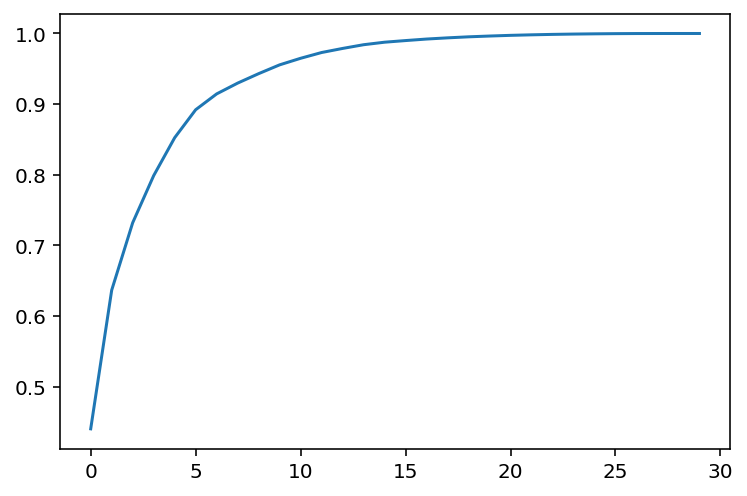

In [97]:
# около 15 признаков "полностью" описывают датасет (метод понижения размерности)
pca = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [ ]:
best_features_ever = ['radius_max', 'perimeter_mean', 'perimeter_std', 'smoothness_mean',
             'concave_points_max', 'compactness_std', 'symmetry_mean', 
             'symmetry_max', 'compactness_mean', 'concavity_std']

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X.loc[:,best_tree_feature_names], y, test_size=0.49)

gb_test = GradientBoostingClassifier(**{'learning_rate': 1.0023052380778996, 
                                        'max_depth': 2.7825594022071245, 
                                        'max_features': 7, 'n_estimators': 30})
scaler = StandardScaler()
gb_test.fit(scaler.fit_transform(X_train), y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=1.0023052380778996, loss='deviance',
                           max_depth=2.7825594022071245, max_features=7,
                           max_leaf_nodes=None, min_impurity_decrease=0.0,
                           min_impurity_split=None, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=30, n_iter_no_change=None,
                           presort='deprecated', random_state=None,
                           subsample=1.0, tol=0.0001, validation_fraction=0.1,
                           verbose=0, warm_start=False)

In [136]:
y_pred = (gb_test.predict_proba(scaler.transform(X_test)) > 0.5).astype(int)[:, 1]
f1_score(y_pred, y_test)

0.9532710280373832